# Polynomial Regression With One Variable
## X; Y - real data results:
$X = \begin{bmatrix}x_1\\x_2\\...\\x_m\end{bmatrix} \quad Y = \begin{bmatrix}y_1\\y_2\\...\\y_m\end{bmatrix}$
## Parameters vector:
$\theta =  \begin{bmatrix}\theta_0\\\theta_1\\...\\\theta_{n-1}\end{bmatrix} $ 
## Trait Vector: 
$\phi(x)= \begin{bmatrix}\phi_0(x)&\phi_1(x)&...&\phi_{n-1}(x)\end{bmatrix} = \begin{bmatrix}x^0&x^1&...&x^{n-1}\end{bmatrix}$  
## Design Matrix:
$ \Phi = \begin{bmatrix}\phi(x_1)\\\phi(x_2)\\...\\\phi(x_{m})\end{bmatrix}= \begin{bmatrix}x_1^0&x_1^1&....&x_1^{n-1}\\x_2^0&x_2^1&...&x_2^{n-1}\\...&...&...&...\\x_m^0&x_m^1&...&x_m^{n-1}\end{bmatrix} $

## Polynomial Function: 
$h_\theta(x) = \theta_0 x^0 + \theta_1 x^1 + ... + \theta_{n-1} x^{n-1}=\phi(x)\theta$

## Cost Function: 
$J(\theta) =  \frac{1}{2m}  \sum_{i=1}^{m}( h_\theta(x_i) - y_i)^2$
## Gradient Descent Algorithm For Polynomial Regression:

repeat until converegence {

$\theta_j:=\theta_j-\alpha\frac{1}{m} \sum_{i=1}^{m} (h_\theta (x_i) - y_i)\cdot x_i^j$ for j:=0,...,n-1

}

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

### Data Generator

In [2]:
def create_random_data_linear(N): 
    a, b = 1, 0.3
    xdata = np.random.uniform(0, 1, size=N)
    ydata = a * xdata + b + np.random.normal(0, 0.15, size=N)
    return {'x':np.array([[x] for x in xdata]), 'y':np.array([[y] for y in ydata])}

def create_random_data_sin(N, start, stop, noise=0.4):
    xdata = np.random.uniform(start, stop, size=N)
    ydata = list()
    for n in range(N):
        ydata.append(math.sin(xdata[n]) + random.uniform(-noise,noise))
        xdata[n] += random.uniform(-noise,noise)
    return {'x':np.array([[x] for x in xdata]), 'y':np.array([[y] for y in ydata])}

### Default Theta Generator

In [3]:
def theta_generator(n, value=1):
    return np.array([[value] for i in range(n)])

def advanced_theta_generator(n, mini, maxi):
    return np.array([[random.uniform(mini,maxi)] for i in range(n)])

### Implementation of design "list"

In [4]:
def design_matrix(data_x, n):
    return np.array([data_x ** i for i in range(n)]).transpose()[0]

In [5]:
def polynomial(x, theta):
    return np.sum([theta[i] * x ** i for i in range(np.shape(theta)[0])], axis=0)

### Implementation of Cost Function: 

In [6]:
def cost_function(data_x, data_y, theta):
    m, _ = np.shape(data_x)
    return 1/(2*m)*np.sum((data_y - polynomial(data_x, theta)) ** 2)

### Implementation of Gradient Descent Algorithm For Polynomial Regression

In [7]:
def find_best_parameters(data_x, data_y, theta, alpha):
    m, _ = np.shape(data_x)
    n, _ = np.shape(theta)
    last_cost = cost_function(data_x, data_y, theta)
    actual_cost = last_cost
    counter = 0
    while actual_cost < last_cost or counter < 10000:
        counter+=1
        poly = polynomial(data_x, theta) - data_y
        for j in range(n):
            deriv = 0
            for i in range(m):
                deriv+=np.sum(poly*data_x[i,0]**j)
            theta[j,0] = theta[j,0] - alpha/m*deriv
        last_cost = actual_cost
        actual_cost = cost_function(data_x, data_y, theta)
    print(f"count: {counter}")
    return theta

### Finding And Drawing Result For Best Linear Model

n: 2
count: 10000
[[0.11327787]
 [0.2162536 ]]


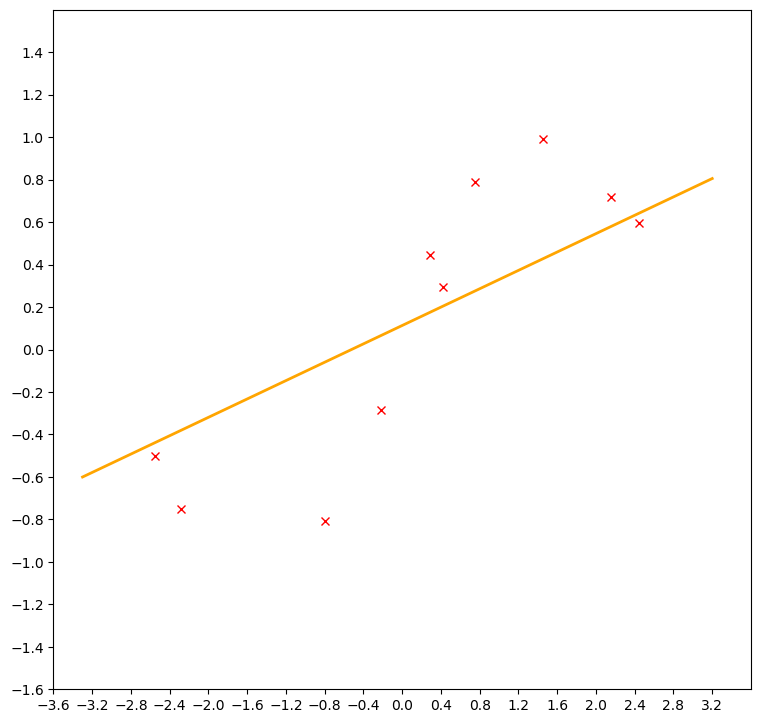

n: 3
count: 10000
[[ 0.39244964]
 [ 0.79012695]
 [-0.14402206]]


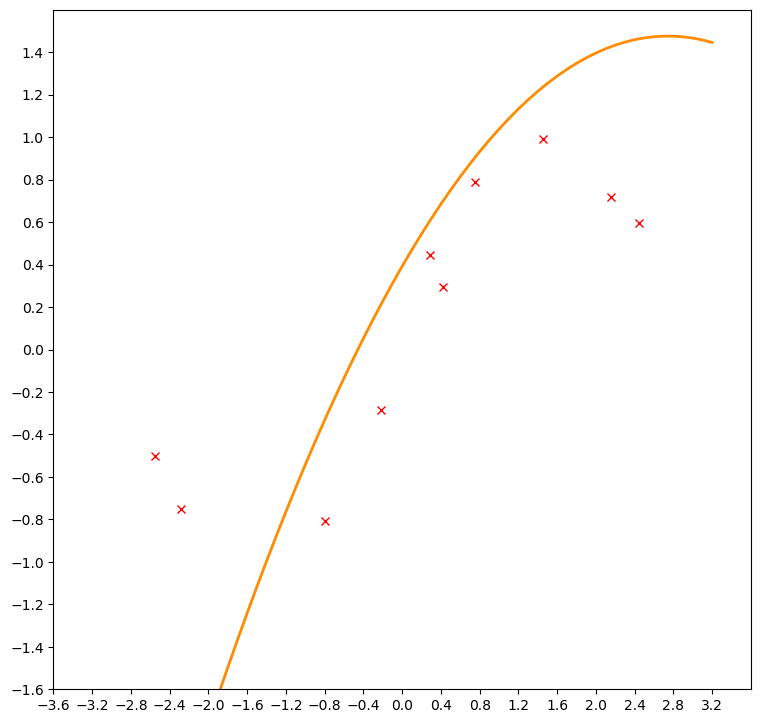

n: 4
count: 10000
[[ 0.10130801]
 [ 0.8721397 ]
 [-0.02947202]
 [ 0.22289648]]


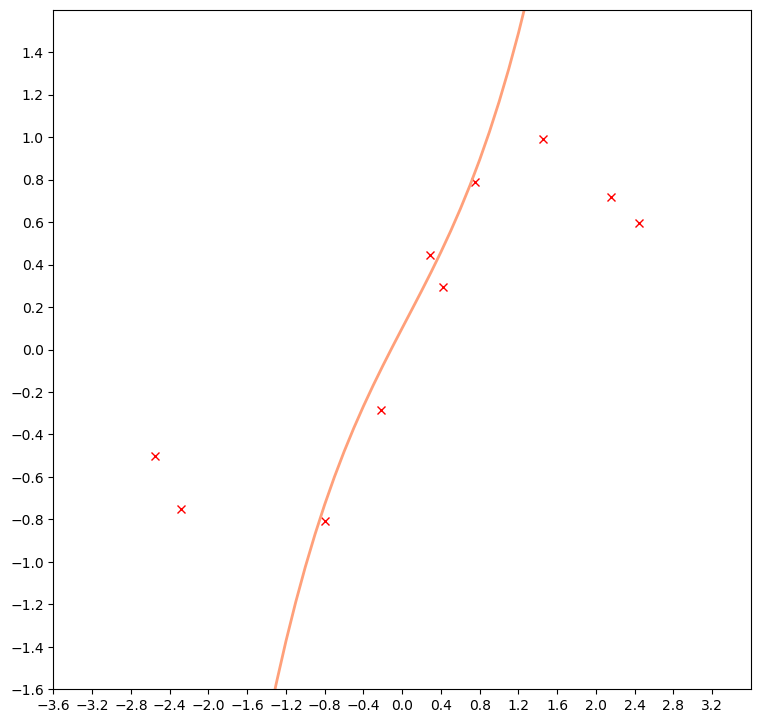

n: 5
count: 10000
[[-0.96610526]
 [-0.64051491]
 [-1.00976403]
 [-0.10613335]
 [ 0.28969118]]


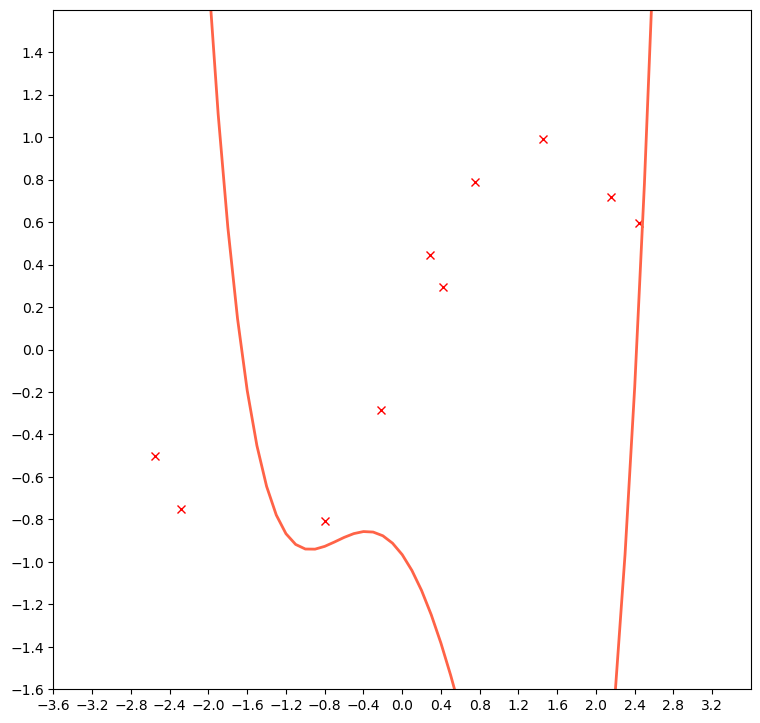

In [13]:
# default values
alpha = 0.001
def_theta = 1
x_min = -3.6
x_max = 3.6
y_min = -1.6
y_max = 1.6
period_x = 0.4
period_y = 0.2

def set_plot():
    plt.figure(figsize=(9,9), dpi=100)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(np.arange(x_min, x_max, period_x))
    plt.yticks(np.arange(y_min, y_max, period_y))
    plt.plot(data['x'], data['y'], 'b x', markeredgecolor='red')

# raw data (dots) call:
data = create_random_data_sin(10,-math.pi, math.pi, 0.1)

# plots
colors = ['yellow', 'orange', 'darkorange', 'lightsalmon', 'tomato', 'red']
x_plot = np.array([[x] for x in np.arange(x_min+0.3,x_max-0.3,0.1)])
for n in range(1,5):
    print("n: {}".format(n+1))
    theta = find_best_parameters(data['x'], data['y'], advanced_theta_generator(n+1, -def_theta,def_theta),alpha)
    y_plot = polynomial(x_plot, theta)
    print(theta)
    set_plot()  
    plt.plot(x_plot, y_plot, color=colors[n], linewidth=2)
    plt.show()